# TRABAJO PRÁCTICO 2

In [248]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.tools import eval_measures

In [249]:
#PENDIENTES
#Conteo propiedades por barrio

In [250]:
data=pd.read_csv('./properatti.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

In [251]:
capital_federal_mask = data.state_name=="Capital Federal"
capital_federal = data[capital_federal_mask]
capital_federal

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...
8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,60.0,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121160,121160,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.563685346,-58.4426825896",-34.563685,...,NaN,2611.464968,NaN,NaN,NaN,6300.0,http://www.properati.com.ar/1cj5v_venta_depart...,Edificio en esquina de muy buena categoría de ...,Av .Luis Maria Campos 1400- Belgrano-Capital F...,https://thumbs4.properati.com/0/zeLNBuyylOJL7z...
121209,121209,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.563685346,-58.4426825896",-34.563685,...,NaN,2611.464968,NaN,NaN,NaN,6300.0,http://www.properati.com.ar/1cj7c_venta_depart...,Edificio en esquina de muy buena categoría de ...,Av .Luis Maria Campos 1400- Belgrano-Capital F...,https://thumbs4.properati.com/0/zeLNBuyylOJL7z...
121215,121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,93.0,7699.115044,9354.838710,NaN,NaN,10000.0,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...
121217,121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,...,39.0,2858.695652,3371.794872,NaN,NaN,NaN,http://www.properati.com.ar/1cja7_venta_depart...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,https://thumbs4.properati.com/9/YAe_-2gRVykADP...


In [252]:
capital_federal_dos = capital_federal.loc[:,('property_type','place_name','surface_total_in_m2','surface_covered_in_m2', 'price')]
capital_federal_dos

,property_type,place_name,surface_total_in_m2,surface_covered_in_m2,price
0,PH,Mataderos,55.0,40.0,62000.0
2,apartment,Mataderos,55.0,55.0,72000.0
3,PH,Liniers,NaN,NaN,95000.0
7,apartment,Belgrano,45.0,40.0,138000.0
8,apartment,Belgrano,65.0,60.0,195000.0
...,...,...,...,...,...
121160,apartment,Belgrano,157.0,NaN,410000.0
121209,apartment,Belgrano,157.0,NaN,410000.0
121215,apartment,Belgrano,113.0,93.0,870000.0
121217,apartment,Villa Urquiza,46.0,39.0,131500.0


In [253]:
capital_federal_apartment_mask = capital_federal.property_type=='apartment'
capital_federal_apartment = capital_federal_dos[capital_federal_apartment_mask]
capital_federal_apartment

,property_type,place_name,surface_total_in_m2,surface_covered_in_m2,price
2,apartment,Mataderos,55.0,55.0,72000.0
7,apartment,Belgrano,45.0,40.0,138000.0
8,apartment,Belgrano,65.0,60.0,195000.0
13,apartment,Palermo Soho,50.0,30.0,111700.0
14,apartment,Palermo Soho,42.0,31.0,147900.0
...,...,...,...,...,...
121160,apartment,Belgrano,157.0,NaN,410000.0
121209,apartment,Belgrano,157.0,NaN,410000.0
121215,apartment,Belgrano,113.0,93.0,870000.0
121217,apartment,Villa Urquiza,46.0,39.0,131500.0


In [254]:
#Porcentaje de nulls respecto al total del dataset por columna

percent_missing = capital_federal_apartment.isnull().sum() * 100 / len(capital_federal_apartment)
missing_value_df = pd.DataFrame({'column_name': capital_federal_apartment.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
surface_total_in_m2,surface_total_in_m2,16.484817
price,price,10.663165
surface_covered_in_m2,surface_covered_in_m2,6.646447
property_type,property_type,0.000000
place_name,place_name,0.000000


In [255]:
capital_federal_apartment.surface_total_in_m2.fillna(capital_federal_apartment.surface_covered_in_m2, inplace=True)


/var/folders/ms/v5w4mc3d0nscpg3rdtjqm5200000gp/T/ipykernel_4266/1765627769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capital_federal_apartment.surface_total_in_m2.fillna(capital_federal_apartment.surface_covered_in_m2, inplace=True)


In [256]:
capital_federal_apartment['surface_uncovered_in_m2'] = capital_federal_apartment.surface_total_in_m2 - capital_federal_apartment.surface_covered_in_m2
capital_federal_apartment

/var/folders/ms/v5w4mc3d0nscpg3rdtjqm5200000gp/T/ipykernel_4266/2375529020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capital_federal_apartment['surface_uncovered_in_m2'] = capital_federal_apartment.surface_total_in_m2 - capital_federal_apartment.surface_covered_in_m2


,property_type,place_name,surface_total_in_m2,surface_covered_in_m2,price,surface_uncovered_in_m2
2,apartment,Mataderos,55.0,55.0,72000.0,0.0
7,apartment,Belgrano,45.0,40.0,138000.0,5.0
8,apartment,Belgrano,65.0,60.0,195000.0,5.0
13,apartment,Palermo Soho,50.0,30.0,111700.0,20.0
14,apartment,Palermo Soho,42.0,31.0,147900.0,11.0
...,...,...,...,...,...,...
121160,apartment,Belgrano,157.0,NaN,410000.0,NaN
121209,apartment,Belgrano,157.0,NaN,410000.0,NaN
121215,apartment,Belgrano,113.0,93.0,870000.0,20.0
121217,apartment,Villa Urquiza,46.0,39.0,131500.0,7.0


[(0.0, 500.0)]

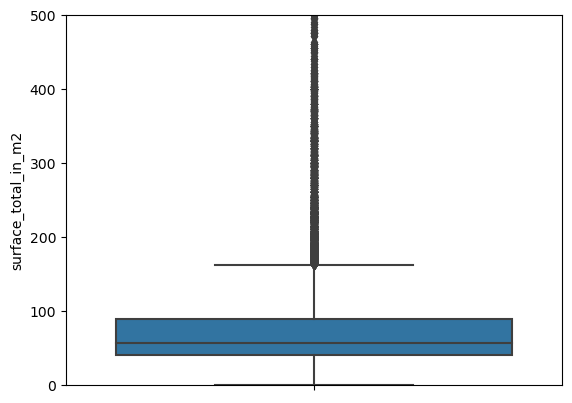

In [257]:
g=sns.boxplot(data=capital_federal_apartment,y='surface_total_in_m2')

g.set(ylim=(0,500))

In [258]:
indice=capital_federal_apartment[capital_federal_apartment['surface_total_in_m2'] > 500]

indice.index


Int64Index([  1276,   5907,   6508,   6676,   7100,   8413,  13037,  13065,
             14022,  14859,  17288,  24159,  24379,  24384,  24548,  28563,
             31184,  34696,  34702,  45122,  45486,  46392,  46709,  46948,
             47109,  47399,  51824,  51995,  52788,  52789,  53048,  53116,
             53896,  54806,  55316,  56484,  57173,  57469,  58045,  58175,
             61820,  62863,  63093,  64104,  64643,  64645,  69472,  71875,
             71887,  73029,  73511,  76012,  76891,  78877,  88136,  88562,
             89003,  95810,  96392,  96438,  96778,  96836, 106459, 109632,
            109722, 109840, 114174, 117183, 118206],
           dtype='int64')

In [259]:
capital_federal_apartment.drop(indice.index, axis=0, inplace=True)

capital_federal_apartment

/var/folders/ms/v5w4mc3d0nscpg3rdtjqm5200000gp/T/ipykernel_4266/1089892398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capital_federal_apartment.drop(indice.index, axis=0, inplace=True)


,property_type,place_name,surface_total_in_m2,surface_covered_in_m2,price,surface_uncovered_in_m2
2,apartment,Mataderos,55.0,55.0,72000.0,0.0
7,apartment,Belgrano,45.0,40.0,138000.0,5.0
8,apartment,Belgrano,65.0,60.0,195000.0,5.0
13,apartment,Palermo Soho,50.0,30.0,111700.0,20.0
14,apartment,Palermo Soho,42.0,31.0,147900.0,11.0
...,...,...,...,...,...,...
121160,apartment,Belgrano,157.0,NaN,410000.0,NaN
121209,apartment,Belgrano,157.0,NaN,410000.0,NaN
121215,apartment,Belgrano,113.0,93.0,870000.0,20.0
121217,apartment,Villa Urquiza,46.0,39.0,131500.0,7.0


[(0.0, 550.0)]

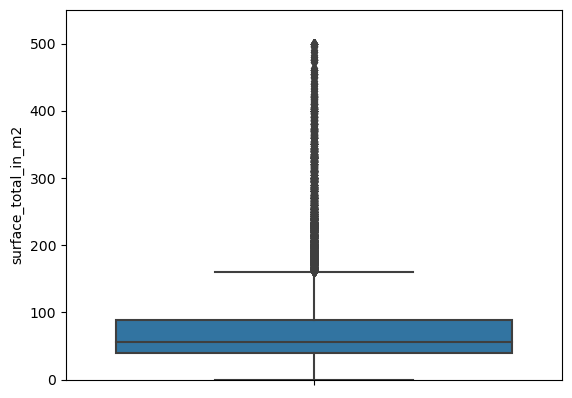

In [260]:
g=sns.boxplot(data=capital_federal_apartment,y='surface_total_in_m2')

g.set(ylim=(0,550))

In [261]:
capital_federal_apartment.drop('surface_total_in_m2', axis=1, inplace=True)


/var/folders/ms/v5w4mc3d0nscpg3rdtjqm5200000gp/T/ipykernel_4266/86561127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capital_federal_apartment.drop('surface_total_in_m2', axis=1, inplace=True)


In [262]:
percent_missing = capital_federal_apartment.isnull().sum() * 100 / len(capital_federal_apartment)
missing_value_df = pd.DataFrame({'column_name': capital_federal_apartment.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
price,price,10.660783
surface_covered_in_m2,surface_covered_in_m2,6.641204
surface_uncovered_in_m2,surface_uncovered_in_m2,6.641204
property_type,property_type,0.000000
place_name,place_name,0.000000


In [263]:
capital_federal_apartment_clean = capital_federal_apartment.dropna()
capital_federal_apartment_clean

,property_type,place_name,surface_covered_in_m2,price,surface_uncovered_in_m2
2,apartment,Mataderos,55.0,72000.0,0.0
7,apartment,Belgrano,40.0,138000.0,5.0
8,apartment,Belgrano,60.0,195000.0,5.0
13,apartment,Palermo Soho,30.0,111700.0,20.0
14,apartment,Palermo Soho,31.0,147900.0,11.0
...,...,...,...,...,...
121157,apartment,Belgrano,35.0,128000.0,3.0
121158,apartment,Recoleta,39.0,165000.0,5.0
121215,apartment,Belgrano,93.0,870000.0,20.0
121217,apartment,Villa Urquiza,39.0,131500.0,7.0


In [264]:
percent_missing = capital_federal_apartment_clean.isnull().sum() * 100 / len(capital_federal_apartment_clean)
missing_value_df = pd.DataFrame({'column_name': capital_federal_apartment_clean.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
property_type,property_type,0.0
place_name,place_name,0.0
surface_covered_in_m2,surface_covered_in_m2,0.0
price,price,0.0
surface_uncovered_in_m2,surface_uncovered_in_m2,0.0


In [265]:
capital_federal_apartment_clean.drop('property_type', inplace=True, axis=1)
capital_federal_apartment_clean

/var/folders/ms/v5w4mc3d0nscpg3rdtjqm5200000gp/T/ipykernel_4266/1491378632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capital_federal_apartment_clean.drop('property_type', inplace=True, axis=1)


,place_name,surface_covered_in_m2,price,surface_uncovered_in_m2
2,Mataderos,55.0,72000.0,0.0
7,Belgrano,40.0,138000.0,5.0
8,Belgrano,60.0,195000.0,5.0
13,Palermo Soho,30.0,111700.0,20.0
14,Palermo Soho,31.0,147900.0,11.0
...,...,...,...,...
121157,Belgrano,35.0,128000.0,3.0
121158,Recoleta,39.0,165000.0,5.0
121215,Belgrano,93.0,870000.0,20.0
121217,Villa Urquiza,39.0,131500.0,7.0


In [266]:
indice=capital_federal_apartment_clean[capital_federal_apartment_clean['price'] > 800000]

indice.index

Int64Index([   219,    252,    351,    352,    353,    354,    355,    356,
               357,    358,
            ...
            120420, 120421, 120422, 120423, 120424, 120425, 120426, 120427,
            120428, 121215],
           dtype='int64', length=2060)

In [267]:
capital_federal_apartment_clean.drop(indice.index, axis=0, inplace=True)

capital_federal_apartment_clean

/var/folders/ms/v5w4mc3d0nscpg3rdtjqm5200000gp/T/ipykernel_4266/134126192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capital_federal_apartment_clean.drop(indice.index, axis=0, inplace=True)


,place_name,surface_covered_in_m2,price,surface_uncovered_in_m2
2,Mataderos,55.0,72000.0,0.0
7,Belgrano,40.0,138000.0,5.0
8,Belgrano,60.0,195000.0,5.0
13,Palermo Soho,30.0,111700.0,20.0
14,Palermo Soho,31.0,147900.0,11.0
...,...,...,...,...
121153,Barrio Norte,65.0,165000.0,26.0
121157,Belgrano,35.0,128000.0,3.0
121158,Recoleta,39.0,165000.0,5.0
121217,Villa Urquiza,39.0,131500.0,7.0


In [268]:
#Cantidad de propiedades por barrio

grouped = capital_federal_apartment_clean.groupby('place_name')

for nombre, frame in grouped:
    cantidad = len(frame)
    #if cantidad < 50
    print(f"El barrio {nombre} tiene {cantidad} propiedades")

El barrio Abasto tiene 72 propiedades
El barrio Agronomía tiene 26 propiedades
El barrio Almagro tiene 798 propiedades
El barrio Balvanera tiene 513 propiedades
El barrio Barracas tiene 280 propiedades
El barrio Barrio Norte tiene 831 propiedades
El barrio Belgrano tiene 1956 propiedades
El barrio Boca tiene 121 propiedades
El barrio Boedo tiene 687 propiedades
El barrio Caballito tiene 1818 propiedades
El barrio Capital Federal tiene 355 propiedades
El barrio Catalinas tiene 1 propiedades
El barrio Centro / Microcentro tiene 153 propiedades
El barrio Chacarita tiene 168 propiedades
El barrio Coghlan tiene 197 propiedades
El barrio Colegiales tiene 248 propiedades
El barrio Congreso tiene 250 propiedades
El barrio Constitución tiene 157 propiedades
El barrio Flores tiene 934 propiedades
El barrio Floresta tiene 259 propiedades
El barrio Las Cañitas tiene 115 propiedades
El barrio Liniers tiene 134 propiedades
El barrio Mataderos tiene 115 propiedades
El barrio Monserrat tiene 411 propi

### Limpio los datos de los barrios que tienen menos de 50 propiedades porque no se podrá predecir correctamente con tan pocas

In [269]:
indice=capital_federal_apartment_clean[(capital_federal_apartment_clean['place_name'] == 'Agronomía')|
(capital_federal_apartment_clean['place_name'] == 'Catalinas' )|
(capital_federal_apartment_clean['place_name'] == 'Monte Castro' )|
(capital_federal_apartment_clean['place_name'] == 'Palermo Viejo')|
(capital_federal_apartment_clean['place_name'] == 'Parque Avellaneda')|
(capital_federal_apartment_clean['place_name'] == 'Parque Chas')|
(capital_federal_apartment_clean['place_name'] == 'Pompeya')|
(capital_federal_apartment_clean['place_name'] == 'Velez Sarsfield')|
(capital_federal_apartment_clean['place_name'] == 'Versalles')|
(capital_federal_apartment_clean['place_name'] == 'Villa General Mitre')|
(capital_federal_apartment_clean['place_name'] == 'Villa Real')|
(capital_federal_apartment_clean['place_name'] == 'Villa Riachuelo')|
(capital_federal_apartment_clean['place_name'] == 'Villa Santa Rita')|
(capital_federal_apartment_clean['place_name'] == 'Villa Soldati')]


In [270]:
capital_federal_apartment_clean.drop(indice.index, axis=0, inplace=True)

capital_federal_apartment_clean

/var/folders/ms/v5w4mc3d0nscpg3rdtjqm5200000gp/T/ipykernel_4266/134126192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capital_federal_apartment_clean.drop(indice.index, axis=0, inplace=True)


,place_name,surface_covered_in_m2,price,surface_uncovered_in_m2
2,Mataderos,55.0,72000.0,0.0
7,Belgrano,40.0,138000.0,5.0
8,Belgrano,60.0,195000.0,5.0
13,Palermo Soho,30.0,111700.0,20.0
14,Palermo Soho,31.0,147900.0,11.0
...,...,...,...,...
121153,Barrio Norte,65.0,165000.0,26.0
121157,Belgrano,35.0,128000.0,3.0
121158,Recoleta,39.0,165000.0,5.0
121217,Villa Urquiza,39.0,131500.0,7.0


In [271]:
grouped = capital_federal_apartment_clean.groupby('place_name')

for nombre, frame in grouped:
    cantidad = len(frame)
    #if cantidad < 50:
    print(f"El barrio {nombre} tiene {cantidad} propiedades")

El barrio Abasto tiene 72 propiedades
El barrio Almagro tiene 798 propiedades
El barrio Balvanera tiene 513 propiedades
El barrio Barracas tiene 280 propiedades
El barrio Barrio Norte tiene 831 propiedades
El barrio Belgrano tiene 1956 propiedades
El barrio Boca tiene 121 propiedades
El barrio Boedo tiene 687 propiedades
El barrio Caballito tiene 1818 propiedades
El barrio Capital Federal tiene 355 propiedades
El barrio Centro / Microcentro tiene 153 propiedades
El barrio Chacarita tiene 168 propiedades
El barrio Coghlan tiene 197 propiedades
El barrio Colegiales tiene 248 propiedades
El barrio Congreso tiene 250 propiedades
El barrio Constitución tiene 157 propiedades
El barrio Flores tiene 934 propiedades
El barrio Floresta tiene 259 propiedades
El barrio Las Cañitas tiene 115 propiedades
El barrio Liniers tiene 134 propiedades
El barrio Mataderos tiene 115 propiedades
El barrio Monserrat tiene 411 propiedades
El barrio Nuñez tiene 529 propiedades
El barrio Once tiene 117 propiedades

In [272]:
#creamos las columnas dummies de barrios para poder correrlo el modelo

dummies = pd.get_dummies(capital_federal_apartment_clean['place_name']).rename(columns=lambda x: 'Barrio_' + str(x))
dummies

# X = pd.concat([dummies, std_df], axis = 1)

,Barrio_Abasto,Barrio_Almagro,Barrio_Balvanera,Barrio_Barracas,Barrio_Barrio Norte,Barrio_Belgrano,Barrio_Boca,Barrio_Boedo,Barrio_Caballito,Barrio_Capital Federal,...,Barrio_San Telmo,Barrio_Tribunales,Barrio_Villa Crespo,Barrio_Villa Devoto,Barrio_Villa Lugano,Barrio_Villa Luro,Barrio_Villa Ortuzar,Barrio_Villa Pueyrredón,Barrio_Villa Urquiza,Barrio_Villa del Parque
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121153,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121157,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Modelo de regresión lineal múltiple

In [273]:
#Estandarización de variables numéricas

numericals = ['surface_uncovered_in_m2', 'surface_covered_in_m2']

X = capital_federal_apartment_clean[numericals]

scaler = StandardScaler()
scaler.fit(X)

std_numerical_data = scaler.transform(X)
std_df = pd.DataFrame(std_numerical_data, index=capital_federal_apartment_clean.index)
std_df.columns = [i + '_std' for i in numericals]

std_df
#data_scaled = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)


,surface_uncovered_in_m2_std,surface_covered_in_m2_std
2,-0.242631,-0.190285
7,-0.073564,-0.495900
8,-0.073564,-0.088413
13,0.433637,-0.699643
14,0.129316,-0.679268
...,...,...
121153,0.636517,0.013458
121157,-0.141191,-0.597771
121158,-0.073564,-0.516274
121217,-0.005938,-0.516274


In [274]:
X = pd.concat([dummies, std_df], axis = 1)
X

,Barrio_Abasto,Barrio_Almagro,Barrio_Balvanera,Barrio_Barracas,Barrio_Barrio Norte,Barrio_Belgrano,Barrio_Boca,Barrio_Boedo,Barrio_Caballito,Barrio_Capital Federal,...,Barrio_Villa Crespo,Barrio_Villa Devoto,Barrio_Villa Lugano,Barrio_Villa Luro,Barrio_Villa Ortuzar,Barrio_Villa Pueyrredón,Barrio_Villa Urquiza,Barrio_Villa del Parque,surface_uncovered_in_m2_std,surface_covered_in_m2_std
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.242631,-0.190285
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.073564,-0.495900
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.073564,-0.088413
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.433637,-0.699643
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.129316,-0.679268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121153,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.636517,0.013458
121157,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.141191,-0.597771
121158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.073564,-0.516274
121217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,-0.005938,-0.516274


In [275]:
y = capital_federal_apartment_clean.price

In [276]:
#Separamos los conjuntos train y test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 117)


In [286]:
 #Tenemos que agregar explícitamente a una constante:
X_train_sm = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_sm)
results = model.fit()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     534.5
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:35:32   Log-Likelihood:            -1.8375e+05
No. Observations:               14350   AIC:                         3.676e+05
Df Residuals:                   14300   BIC:                         3.680e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        1.763e+05   1118.632    157.613      0.000    1.74e+05    1.79e+05
Barrio_Abasto               -2.477e+04   1.13e+04     -2.192      0.028   -4.69e+04   -2618.486
Barrio_Almagro               -1.23e+04   3875.919     -3.173      0.002   -1.99e+04   -4700.163
Barrio_Balvanera              -5.1e+04   4745.909    -10.747      0.000   -6.03e+04   -4.17e+04
Barrio_Barracas              -3.54e+04   6257.950     -5.656      0.000   -4.77e+04   -2.31e+04
Barrio_Barrio Norte          4.197e+04   3782.973     11.093      0.000    3.46e+04    4.94e+04
Barrio_Belgrano              4.448e+04   2595.342     17.136      0.000    3.94e+04    4.96e+04
Barrio_Boca                 -3.532e+04   9665.803     -3.654      0.000   -5.43e+04   -1.64e+04
Barrio_Boedo                 2.137e+05   4191.211     50.990      0.000    2.05e+05    2.22e+05
Barrio_Caballito            -2231.5077   2643.474     -0.844      0.399   -7413.060    2950.044
Barrio_Capital Federal      -7280.2072   5446.674     -1.337      0.181    -1.8e+04    3395.980
Barrio_Centro / Microcentro -2.522e+04   8587.257     -2.937      0.003   -4.21e+04   -8392.773
Barrio_Chacarita            -2.016e+04   7874.865     -2.560      0.010   -3.56e+04   -4720.777
Barrio_Coghlan              -1853.1506   7239.555     -0.256      0.798    -1.6e+04    1.23e+04
Barrio_Colegiales            3132.3023   6663.050      0.470      0.638   -9928.141    1.62e+04
Barrio_Congreso             -4.787e+04   6838.551     -7.000      0.000   -6.13e+04   -3.45e+04
Barrio_Constitución         -6.163e+04   8276.561     -7.446      0.000   -7.79e+04   -4.54e+04
Barrio_Flores               -3.194e+04   3581.122     -8.920      0.000    -3.9e+04   -2.49e+04
Barrio_Floresta              -4.66e+04   6400.250     -7.281      0.000   -5.91e+04   -3.41e+04
Barrio_Las Cañitas           9.508e+04   9787.667      9.714      0.000    7.59e+04    1.14e+05
Barrio_Liniers              -3.373e+04   9124.527     -3.697      0.000   -5.16e+04   -1.58e+04
Barrio_Mataderos            -4.448e+04   1.04e+04     -4.281      0.000   -6.48e+04   -2.41e+04
Barrio_Monserrat            -3.758e+04   5098.675     -7.370      0.000   -4.76e+04   -2.76e+04
Barrio_Nuñez                 3.619e+04   4570.658      7.919      0.000    2.72e+04    4.52e+04
Barrio_Once                  -5.67e+04   9845.589     -5.759      0.000    -7.6e+04   -3.74e+04
Barrio_Palermo               6.235e+04   2622.618     23.775      0.000    5.72e+04    6.75e+04
Barrio_Palermo Chico          1.68e+05   1.01e+04     16.705      0.000    1.48e+05    1.88e+05
Barrio_Palermo Hollywood     4.637e+04   5379.965      8.620      0.000    3.58e+04    5.69e+04
Barrio_Palermo Soho          3.914e+04   6355.253      6.159      0.000    2.67e+04    5.16e+04
Barrio_Parq

In [289]:
no_reg_model_params = results.params


In [292]:
sm_prediction_train = results.predict(X_train_sm)
print(eval_measures.rmse(y_train, sm_prediction_train))

X_test_sm = sm.add_constant(X_test)
sm_prediction_test = results.predict(X_test_sm)
print(eval_measures.rmse(y_test, sm_prediction_test))

88050.24230524497
107780.97675081597


In [306]:
print ('Modelo OLS:\n')
print(X_train_sm.shape)
print(y_train.shape)
print(X_test_sm.shape)
print(y_test.shape)

print (f'Score (R^2) en train del modelo es {model.score(X_train, y_train)} y en test es {model.score(X_test, y_test)}')


print ('\n')

Modelo OLS:

(14350, 50)
(14350,)
(6151, 50)
(6151,)


ValueError: shapes (51,51) and (14350,50) not aligned: 51 (dim 1) != 14350 (dim 0)

### Regularización

In [ ]:
# Definimos el rango de de búsqueda del hiperparametro explicitamente
lm_lasso = linear_model.LassoCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10],\
                                        normalize = False, cv = 5)

model_cv = lm_lasso.fit(X_train, y_train)

model_cv.score(X_train, y_train)

/Users/juanmartingarcia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


0.6374545384734125

In [ ]:
model_cv.coef_

array([ -1352.47483255,     -0.        ,   8836.74387597, -29691.75127538,
       -10510.42176436,  61989.42007031,  63143.84831499, -10027.07723679,
       234332.75116651,  17785.54329472,  12838.4907444 ,      0.        ,
        -4521.28469837,      0.        ,  16751.90447268,  26609.99106354,
       -30870.49792806, -39156.74292337, -11479.8790604 , -24949.0336538 ,
       126132.45192168, -20305.75604688, -17644.40797973, -22006.21254698,
       -15135.47344616,  53645.96860122, -30316.18201096,  79324.96955424,
       184370.05106005,  65798.85805281,  59304.49027711,  53772.70817985,
       -35042.29615782,    474.08782582, -17836.41406196,      0.        ,
        -6646.17770556, -16154.95634662,      0.        , 276174.82183423,
        91106.65663994,  41191.54421597,  15225.86305199,  79700.0246443 ,
       -21923.22536504,  -1259.8298434 , -21978.70939364,     -0.        ,
        -8441.36493908,  14226.59338008,  16335.13491902,  -5347.08969679,
       -76386.2756992 ,  

In [ ]:
model_cv.intercept_

156515.29912376625

In [ ]:
model_cv.alpha_

10.0

In [ ]:
model_cv.score(X_train, y_train)

0.6374545384734125

In [ ]:
best_alpha = model_cv.alpha_

#L1_wt : 0, the fit is ridge regression. 1, the fit is the lasso

no_reg_model = sm.OLS(y_train, X_train_sm)

reg_model = no_reg_model.fit_regularized(alpha = best_alpha, L1_wt = 1)

In [ ]:
 reg_model.params

const                          180343.076874
Barrio_Abasto                  -25167.987034
Barrio_Agronomía               -15768.826411
Barrio_Almagro                 -14460.757450
Barrio_Balvanera               -53524.023270
                                   ...      
Barrio_Villa Soldati           -96024.190832
Barrio_Villa Urquiza            -3369.197720
Barrio_Villa del Parque        -16237.128888
surface_uncovered_in_m2_std     29531.824319
surface_covered_in_m2_std      109297.809237
Length: 65, dtype: float64

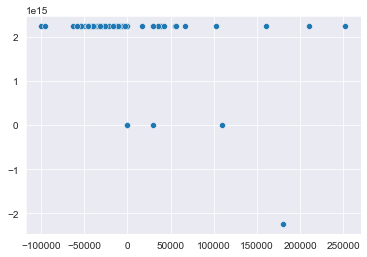

In [ ]:
sns.scatterplot(x=reg_model.params, y=no_reg_model_params);

<AxesSubplot:>

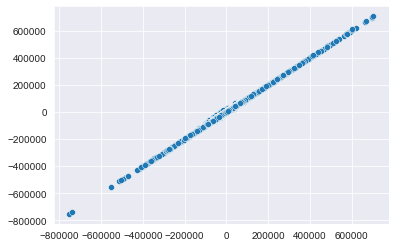

In [ ]:
reg_residuals = y_train - reg_model.fittedvalues

linear_residuals = y_train - model.fittedvalues

sns.scatterplot(x = reg_residuals, y = linear_residuals)

In [ ]:
sm_prediction = reg_model.predict(X_test_sm)
sm_prediction

53129     348949.301226
119092    145634.648695
119687    220328.327049
31937     143172.437005
86009     192303.069101
              ...      
110795    126002.492638
119868    236967.280096
95727      81732.294942
45677     146270.529882
32879     182137.438276
Length: 6229, dtype: float64

In [ ]:
skl_lasso = linear_model.Lasso(alpha = best_alpha, fit_intercept=True, normalize=False)

skl_lasso = skl_lasso.fit(X= X_train, y = y_train)

skl_prediction = skl_lasso.predict(X_test)


/Users/juanmartingarcia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


<AxesSubplot:xlabel='price'>

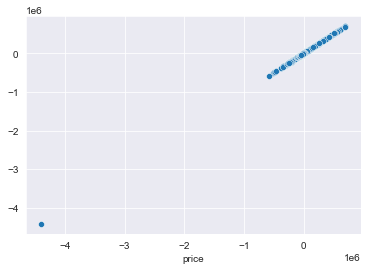

In [ ]:
skl_residuals = y_test - skl_prediction

sm_residuals = y_test - sm_prediction

sns.scatterplot(x = skl_residuals, y = sm_residuals)

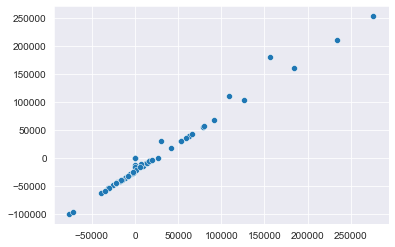

In [ ]:
lasso_coef = np.insert(skl_lasso.coef_, 0, skl_lasso.intercept_)

sns.scatterplot(x = lasso_coef, y = reg_model.params);

In [ ]:
lasso_coef

array([156515.29912377,  -1352.47483255,     -0.        ,   8836.74387597,
       -29691.75127538, -10510.42176436,  61989.42007031,  63143.84831499,
       -10027.07723679, 234332.75116651,  17785.54329472,  12838.4907444 ,
            0.        ,  -4521.28469837,      0.        ,  16751.90447268,
        26609.99106354, -30870.49792806, -39156.74292337, -11479.8790604 ,
       -24949.0336538 , 126132.45192168, -20305.75604688, -17644.40797973,
       -22006.21254698, -15135.47344616,  53645.96860122, -30316.18201096,
        79324.96955424, 184370.05106005,  65798.85805281,  59304.49027711,
        53772.70817985, -35042.29615782,    474.08782582, -17836.41406196,
            0.        ,  -6646.17770556, -16154.95634662,      0.        ,
       276174.82183423,  91106.65663994,  41191.54421597,  15225.86305199,
        79700.0246443 , -21923.22536504,  -1259.8298434 , -21978.70939364,
           -0.        ,  -8441.36493908,  14226.59338008,  16335.13491902,
        -5347.08969679, -

In [ ]:
reg_model.params

const                          180343.076874
Barrio_Abasto                  -25167.987034
Barrio_Agronomía               -15768.826411
Barrio_Almagro                 -14460.757450
Barrio_Balvanera               -53524.023270
                                   ...      
Barrio_Villa Soldati           -96024.190832
Barrio_Villa Urquiza            -3369.197720
Barrio_Villa del Parque        -16237.128888
surface_uncovered_in_m2_std     29531.824319
surface_covered_in_m2_std      109297.809237
Length: 65, dtype: float64

In [ ]:
eval_measures.rmse(y_test, sm_prediction)

105808.97924585796

In [ ]:
eval_measures.meanabs(y_test, sm_prediction)


52045.604708629

In [ ]:
metrics.r2_score(y_test, sm_prediction)


0.48616234849297035

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, skl_prediction))

105696.8958903369

In [ ]:
metrics.mean_absolute_error(y_test, skl_prediction)

51970.00810390419

In [ ]:
metrics.r2_score(y_test, skl_prediction)

0.48725038742245075

[(100.0, 1000000.0)]

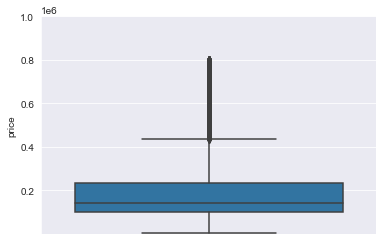

In [ ]:
g=sns.boxplot(data=capital_federal_apartment_clean,y="price")

g.set(ylim=(100,1000000))

In [ ]:
indice=capital_federal_apartment_clean[capital_federal_apartment_clean['price'] > 800000]

indice.index

Int64Index([], dtype='int64')

In [ ]:
capital_federal_apartment_clean.drop(indice.index, axis=0, inplace=True)

capital_federal_apartment_clean

/var/folders/_n/jd2g51ps29j_lml05lw1fzrh0000gp/T/ipykernel_81056/971147271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capital_federal_apartment_clean.drop(indice.index, axis=0, inplace=True)


,place_name,surface_covered_in_m2,price,surface_uncovered_in_m2
2,Mataderos,55.0,72000.0,0.0
7,Belgrano,40.0,138000.0,5.0
8,Belgrano,60.0,195000.0,5.0
13,Palermo Soho,30.0,111700.0,20.0
14,Palermo Soho,31.0,147900.0,11.0
...,...,...,...,...
121153,Barrio Norte,65.0,165000.0,26.0
121157,Belgrano,35.0,128000.0,3.0
121158,Recoleta,39.0,165000.0,5.0
121217,Villa Urquiza,39.0,131500.0,7.0


[(100.0, 1000000.0)]

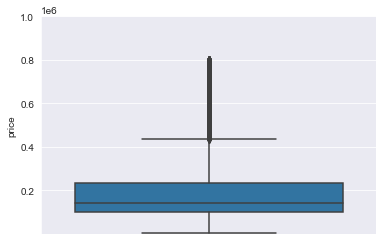

In [ ]:
g=sns.boxplot(data=capital_federal_apartment_clean,y="price")

g.set(ylim=(100,1000000))